### Random forest model training

In [11]:
import pandas as pd
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt


In [12]:
#import the csv file needed to train the model
df=pd.read_csv('cleaned_busyness_data.csv')
df.head(10)

,remote_unit_id,time_stamp,entries,exits,surrounding_area_busyness,station_busyness,hour,day,month,temperature,weather,rain_fall,snow_fall
0,R001,1546300800,0,0,61,12,0,Tuesday,January,3.42,Rain,3.06,4.40
1,R001,1546315200,102,104,61,18,4,Tuesday,January,5.89,Rain,3.77,2.21
2,R001,1546329600,96,51,55,16,8,Tuesday,January,11.18,Mist,0.00,0.12
3,R001,1546344000,260,476,82,42,12,Tuesday,January,13.55,Rain,0.25,0.06
4,R001,1546358400,540,496,55,58,16,Tuesday,January,11.68,Rain,0.50,0.25
5,R001,1546372800,602,250,22,48,20,Tuesday,January,3.70,Clouds,0.00,0.05
6,R001,1546387200,159,147,59,22,0,Wednesday,January,2.05,Clouds,0.00,0.00
7,R001,1546401600,48,38,59,14,4,Wednesday,January,-0.06,Clouds,0.00,0.00
8,R001,1546416000,516,434,51,54,8,Wednesday,January,-2.08,Clear,0.00,0.00
9,R001,1546430400,842,1351,96,96,12,Wednesday,January,-1.88,Clear,0.00,0.00


In [15]:
#convert monthand day to numerical columns
df['month']=df['month'].map({'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,
                                'July':7,'August':8,'September':9,'October':10,'November':11,'December':12})
df['day']=df['day'].map({'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7})


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297835 entries, 0 to 297834
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   remote_unit_id             297835 non-null  object 
 1   time_stamp                 297835 non-null  int64  
 2   entries                    297835 non-null  int64  
 3   exits                      297835 non-null  int64  
 4   surrounding_area_busyness  297835 non-null  int64  
 5   station_busyness           297835 non-null  int64  
 6   hour                       297835 non-null  int64  
 7   day                        297835 non-null  int64  
 8   month                      297835 non-null  int64  
 9   temperature                297835 non-null  float64
 10  weather                    297835 non-null  object 
 11  rain_fall                  297835 non-null  float64
 12  snow_fall                  297835 non-null  float64
dtypes: float64(3), int64(8), obje

In [17]:
#convert weather and remote unit id to categorical columns
df['weather']=df['weather'].astype('category')
df['remote_unit_id']=df['remote_unit_id'].astype('category')

/tmp/ipykernel_19014/2506163149.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mat=df.corr()


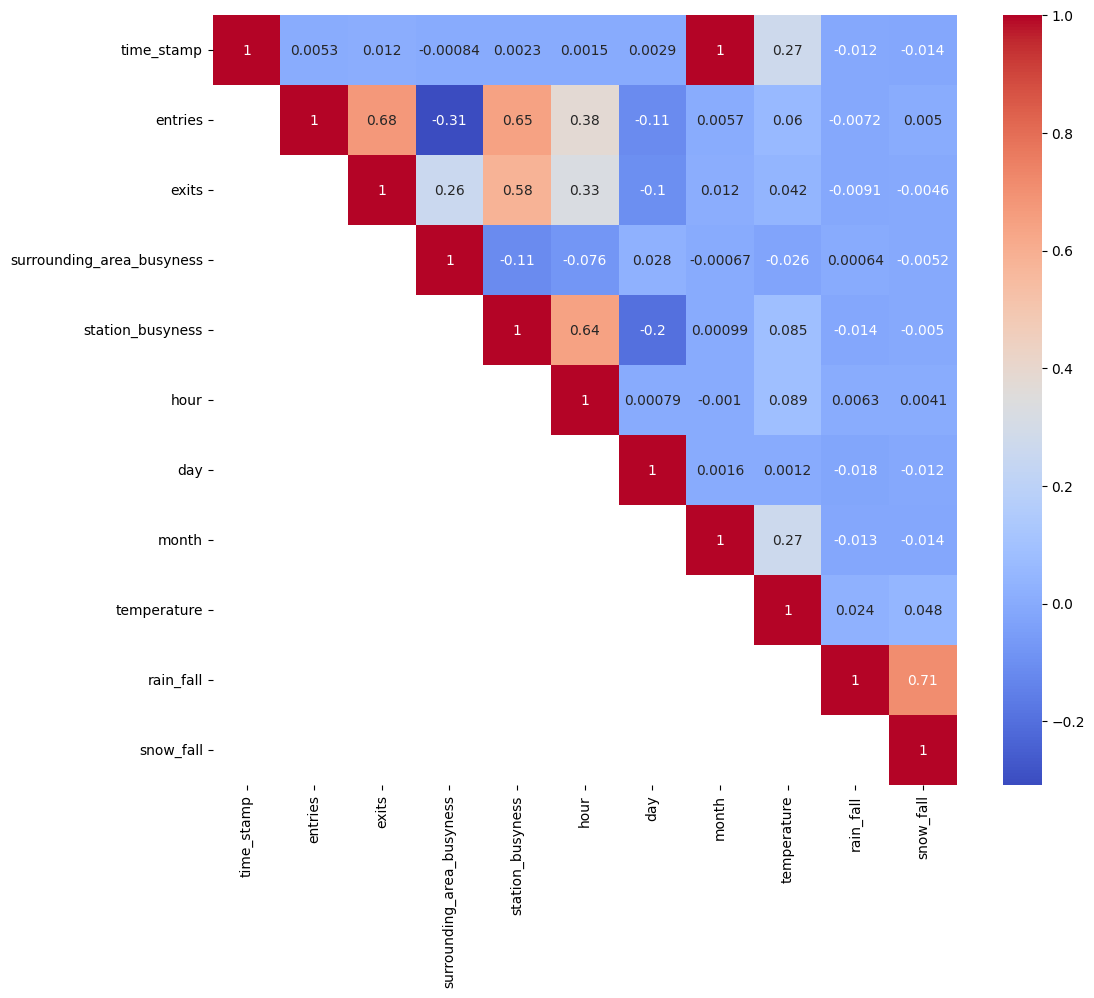

In [18]:
mat=df.corr()

# create a mask to drop the upper triangle
mask = np.triu(np.ones_like(mat, dtype=bool))

# apply the mask to the correlation matrix
mat = mat.where(mask)

fig, ax = plt.subplots(figsize=(12, 10))

sea.heatmap(mat, annot=True, cmap='coolwarm', ax=ax)

# show the plot
plt.show()

In [14]:
df.columns

Index(['remote_unit_id', 'time_stamp', 'entries', 'exits',
       'surrounding_area_busyness', 'station_busyness', 'hour', 'day', 'month',
       'temperature', 'weather', 'rain_fall', 'snow_fall'],
      dtype='object')

## One hot encoding for categorical features


In [ ]:
one_hot = pd.get_dummies(df["day",'month',])
df = pd.concat([df, one_hot], axis = 1)